## Microsoft Studios Project


* ### Student name: Samwel Kagwi Muiru
* ### Student pace: Full Time
* ### Instructor name: William Okomba
* ### Blog post URL: https://github.com/S-Kagwi/dsc-phase-1-project-v2-4.git


### Project Overview

For this project, we will use exploratory data analysis to generate insights for a business stakeholder.

**Following the creation of movie studio, we have been tasked by Microsoft, who have no idea about making films, to identify what makes a film perform well at the box office. After identifying return on investment (RoI) as the primary metric of success, we narrowed down the datasets provided to the top 200 most grossing movies worldwide then calculated the RoI for each. After plotting several scatter and bar plots comparing runtime, production budget, gross revenue, release date, genre, directors, writers, and rating, the analysis identified the following:
The best time to release a film is during Summer.
Films directed by Kyle Balda, Pierre Coffin, Chris Rennaud, David F. Sandberg, and James Wan perform the best, whereas those Gary Dauberman were the most successful of all the other writers.
Lastly we that length of a film, gross revenue and rating, and have no impact on the RoI of a film.

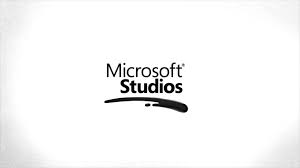

### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don't know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Microsoft's new studio can use to help decide what type of films to create.

**Microsoft has decided to enter the original video content scene by creating a new movie studio. However, they don't know anything about creating movies. In order to solve this problem, the analysis shall be centered around answering the following question:

What types of films are currently performing the best at the box office?
According to this Holywood Reporter article, we see that the metric used to determine performance of a movie at the box office may vary. Therefore, it is important to clarify that within this analysis, the metric that shall be used to determine the success of a movie will be based on the return on investment (RoI) of the highest grossing films. RoI is an important performance measure used by businesses to evaluate the profitability of an investment or compare the efficiency of a number of different investments.

In order to further understand the types of movies that are currently performing the best at the box office, this analysis will look into the impact following features have on the RoI:

Runtime

Production Budget

Gross Revenue

Release Date

Genre

Directors

Writers

Rating

# EDA

In [45]:
#we import the libraries that we will need 

#pandas for data analysis
import pandas as pd

#NumPy for numerical analysis
import numpy as np

# matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sqlite3 for database management
import sqlite3

# 1. Bom Movie CSV Dataset

### Data Understanding

In [9]:
#we first load the given dataset and view the data
bom_movie = pd.read_csv("bom.movie_gross.csv")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [199]:
#we check the shape of the data
bom_movie.shape

(3387, 5)

In [200]:
#We use bom_movie.info to get a concise summary of the dataframe.
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [201]:
#We use .describe() to calculate the basic summary statistics for each column with numerical data.
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### Data Cleaning

In [204]:
#we check the column labels of the Dataframe
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [141]:
#we check for duplicated values
bom_movie.duplicated().sum()

0

In [209]:
#we check for any missing data values
bom_movie.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [210]:
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

We discover that the 'studio', 'domestic_gross' and 'foreign gross' columns have missing data.

In [249]:
#We drop the 'foreign gross' column due to alot of missing data.
bom_movie.drop("foreign_gross", axis=1, inplace=True)

In [251]:
#We replace the missing values in the domestic gross column with the mean value
mean_bom = bom_movie['domestic_gross'].mean()
bom_movie['domestic_gross'].fillna(mean_bom, inplace = True)

In [252]:
#We replace the missing values in the studio column with the mode value
mode_bom = bom_movie['studio'].mode()[0]
bom_movie['studio'].fillna(mode_bom, inplace = True)

In [253]:
domestic_gross_ = bom_movie.groupby('studio')["domestic_gross"].sum()
domestic_gross_.sort_values(ascending = False).head()

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.488429e+09
Name: domestic_gross, dtype: float64

In [142]:
#we check the summarised data to confirm our changes
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
bom_movie['studio'].value_counts().head(10)

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

### Data Analysis and Visualization

We plot a bar graph that shows the Top 10 studios based on the domestic gross income.

In [144]:
studio_data = bom_movie.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
top_10_studios = studio_data[:10]

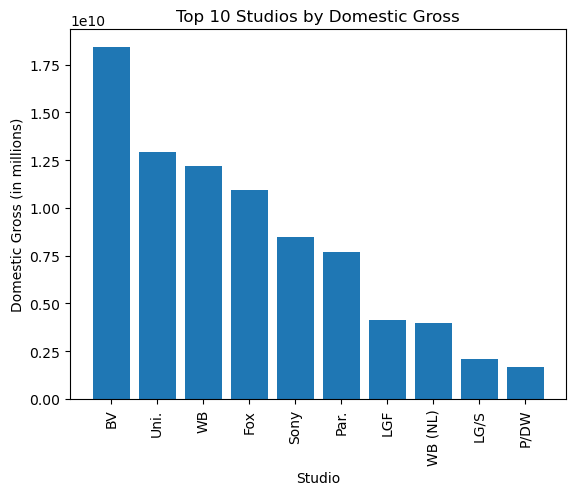

In [145]:
top_10_studios = studio_data[:10]
plt.bar(top_10_studios.index, top_10_studios.values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Top 10 Studios by Domestic Gross')
plt.show()

**The graph displays the top 10 studios based on their domestic gross in millions. The graph is a bar chart, where the x-axis shows the name of the studios, and the y-axis shows their domestic gross in millions. The bar chart is easy to read and understand, and the use of color can enhance the presentation.
Based on the graph, it is clear that the Walt Disney Studios Motion Pictures is the top-grossing studio, with a domestic gross of over $11 billion, followed by Warner Bros. Pictures, Universal

# 2. TN MOVIE BUDGETS FILE

### Data Understanding

In [46]:
#we first load the given dataset and view the data
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [248]:
#we check the shape of the data
movie_budgets.shape

(5782, 6)

This data has 5782 rows and 6 columns.

In [222]:
#we check a summary of the data
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This dataset contains data in the float, interger and object types.

### Data Cleaning

In [28]:
#we check for any duplicated values
movie_budgets.duplicated().sum()

0

In [29]:
#we check for any missing values
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no duplicated rows in the data set.

In [26]:
#we convert production_budget, domestic_gross and worldwide_gross columns from objects to floats
#we then remove the dollar signs ($) and commas from the values

movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets

C:\Users\Grey 1\AppData\Local\Temp\ipykernel_6164\1377922522.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Grey 1\AppData\Local\Temp\ipykernel_6164\1377922522.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Grey 1\AppData\Local\Temp\ipykernel_6164\1377922522.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressio

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [40]:
#we then verify that the values in the production_budget, domestic_gross and worldwide_gross columns are now float data types
movie_budgets.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

The three highlighted columns likely represent the production budget and revenue figures for each movie, which can be used for financial analysis.

In [282]:
#we preview our data again
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


As seen above, the values in the release_date column are float data type. We have to convert in order to use the data.

In [27]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [28]:
movie_budgets['year'] = movie_budgets['release_date'].dt.year
movie_budgets['month'] = movie_budgets['release_date'].dt.month
movie_budgets['day'] = movie_budgets['release_date'].dt.day

#we print the updated dataframe
print(movie_budgets)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  year  month  day  
0           425000000.0     760507625.0     2.776345e+09  2009     12   18  
1    

We check updated information of the data to see the changes that we have made.

In [43]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
 8   day                5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 406.7+ KB


In [283]:
#we check summary statistics data
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


### Data Analysis and Visualization

#### Histogram

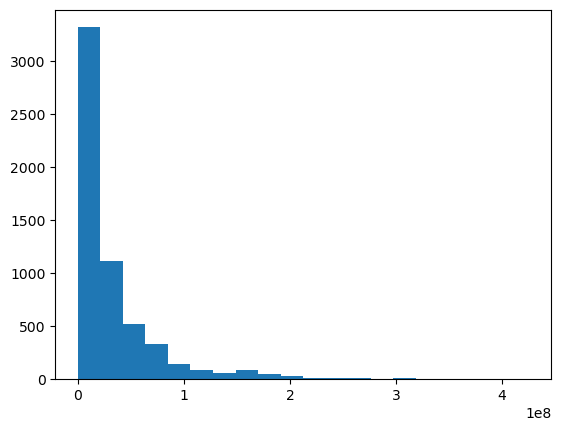

In [291]:
#we check the average production budget for movies
plt.hist(movie_budgets['production_budget'], bins = 20);

# 

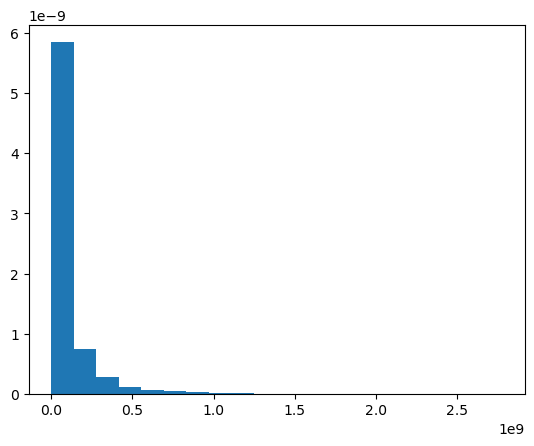

In [297]:
#we check the average gross revenue for movies
plt.hist(movie_budgets['worldwide_gross'], bins = 20, density = True, alpha = 1);

#### Correlation

We check for whether there exists a relationship between the production budget and the total gross revenue of a movie.

In [41]:
#we find the total of domestic and worldwide gross for each movie
movie_budgets['total_gross'] =(movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross'])
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,total_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,3.536853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,1.286728e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,1.925247e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,1.862020e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,1.936903e+09


In [42]:
#we calculate the Pearson correlation coefficient
correlation_pr_tg = round(movie_budgets['production_budget'].corr(movie_budgets['total_gross']),2)
print("The correlation between production budget and total gross revenue is :", correlation_pr_tg)

The correlation between production budget and total gross revenue is : 0.74


We plot the correlation in a scatter plot.

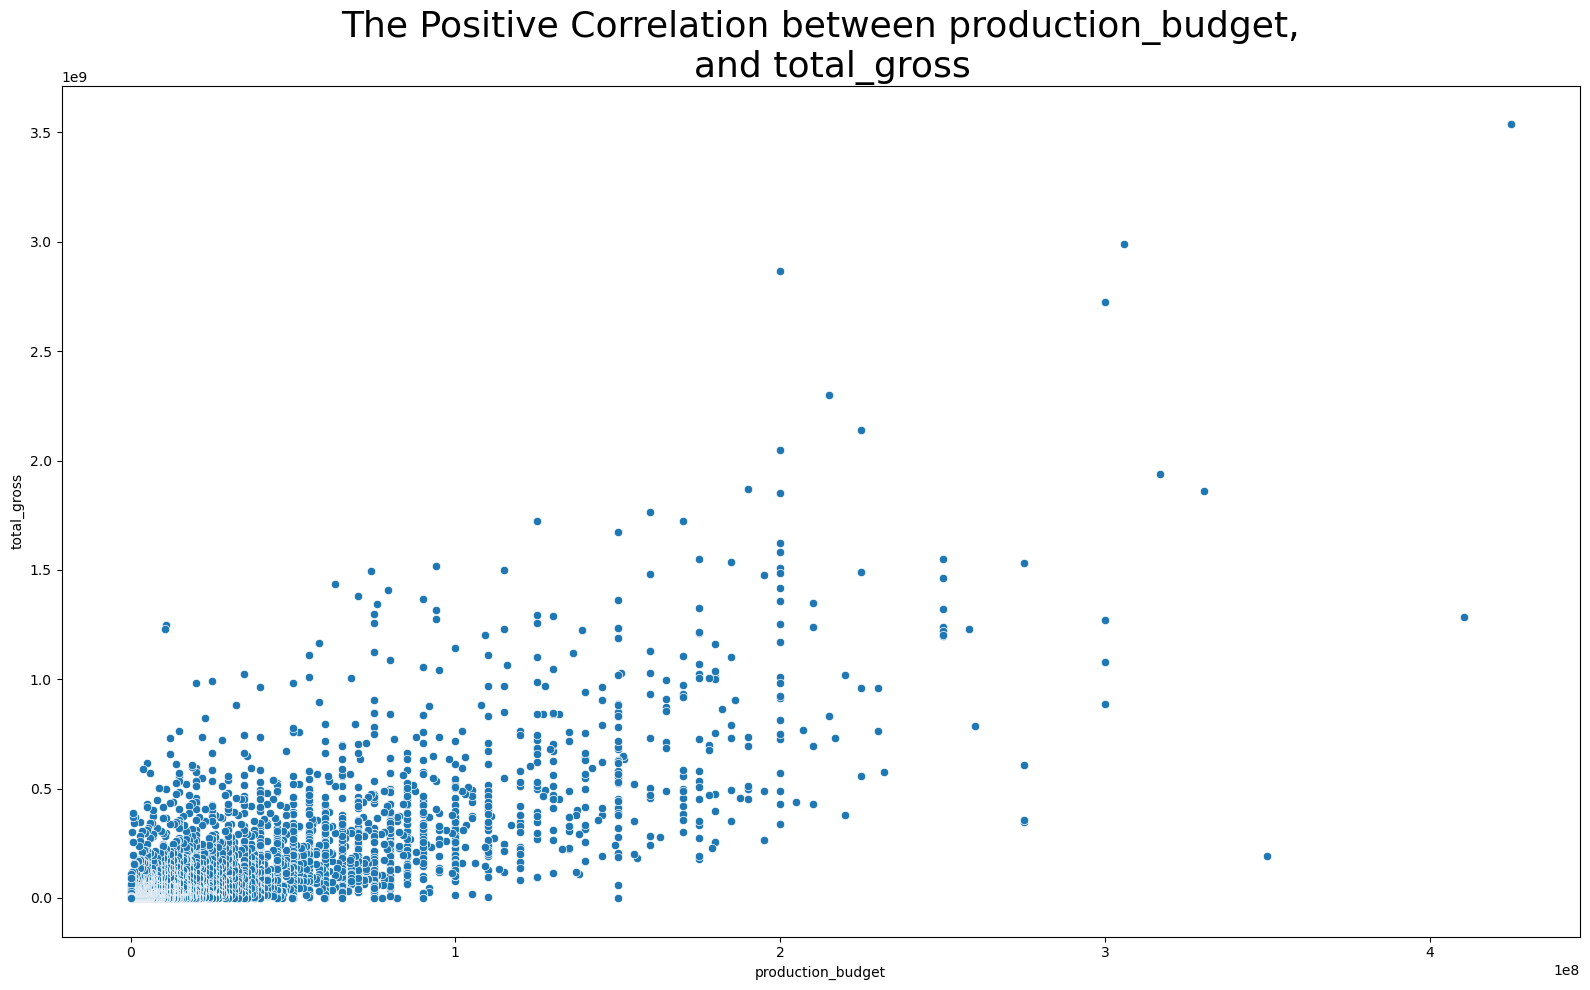

In [43]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='total_gross', data = movie_budgets,)
plt.title("The Positive Correlation between production_budget,\n  and total_gross", fontsize=26)
plt.tight_layout()
plt.show()

Based on the scatter plot, we can see a relationship between the production budget and the total gross revenue. It shows that movies with higher production budgets end to have higher total gross revenue. We can confirm this by looking at the Pearson correlation coefficient (0.74). We see that it is closer to 1, therefore confirming that there is indeed a strong relationship between the production budget and the total gross revenue generated by a movie.

In [106]:
movie_budgets['return_on_inv'] = ((movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross'] - movie_budgets['production_budget']) / movie_budgets['production_budget']).round(2)
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,7.32
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.13
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.45
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.63
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,5.11
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-1.00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,47.16
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-0.46
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.00


In [107]:
movie_budget_sample = movie_budget.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]
movie_budget_sample

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,647.07
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,643.21
5773,74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,582.26
5613,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,541.50
5709,10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,518.43
5346,47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,431.16
5715,16,"Aug 9, 1995",The Brothers McMullen,50000.0,10426506.0,10426506.0,416.06
5665,66,"Oct 18, 1974",The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,378.61
5676,77,"Oct 1, 1968",Night of the Living Dead,114000.0,12087064.0,30087064.0,368.95
5536,37,"Oct 17, 1978",Halloween,325000.0,47000000.0,70000000.0,359.00


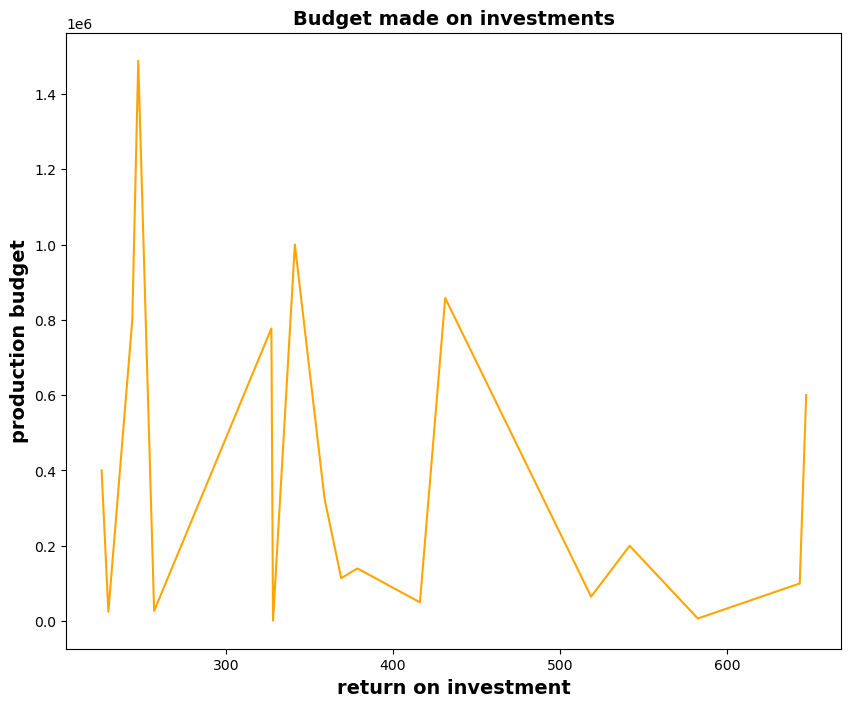

In [108]:
x = movie_budget_sample["return_on_inv"]
y = movie_budget_sample['production_budget'] 
plt.xlabel("return on investment", fontsize=14, fontweight='bold')
plt.ylabel("production budget", fontsize =14, fontweight= 'bold')
plt.title("Budget made on investments", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.plot(x,y, color = 'orange');

**Although there is a positive correlation between production budget and worldwide gross, it is important to evaluate the return on investment (ROI) of a movie. microsoft may want to analyze the profitability of their movies by comparing the production budget to the worldwide gross and factoring in other expenses such as marketing and distribution costs.

# 3. IMDB file

The ERD (Entity Relation Diagram) for this database is shown below:

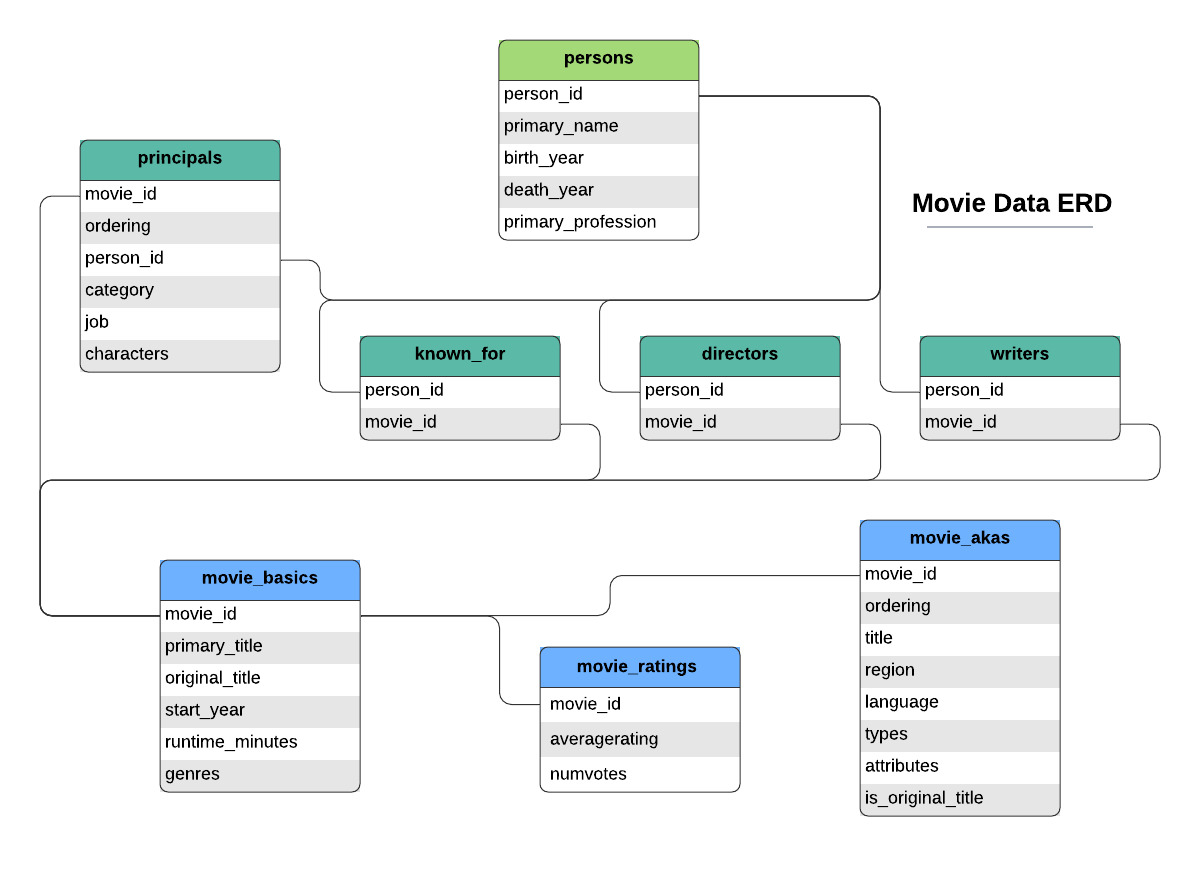

### Data Understanding

In [16]:
#we connect to the database
conn = sqlite3.connect("im.db")

In [17]:
#Here, we import data from the movie_basics file.
imdb_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)
imdb_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [355]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The table contains object, float and integer as data types.

In [18]:
#We import data from the movie_ratings file.
imdb_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
"""
            ,conn)
imdb_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [357]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The table contains object, float and integer as data types.

In [19]:
#We then join the two tables using a unique identifier (movie_id).
imdb = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id);
""",conn)
imdb.head(50)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [364]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The joined table contains object, float and integer as data types.

### Data Preparation

In [365]:
#we check for missing values in the data
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

This means that the data set has 7,620 missing values in  the runtime_minutes column and 804 missing values in the genres column.

In [345]:
#we check for any duplicated rows
imdb.duplicated().sum()

0

There are no duplicated rows in the data.

In [111]:
#Since the 'genre' column is categorical data, we replace the missing values with the mode (most-occurring value)
imdb['genres'].mode()[0]

'Drama'

In [112]:
#we confirm that drama is the mode of the 'genre' column
imdb['genres'].value_counts()

Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: genres, Length: 923, dtype: int64

In [374]:
#We replace the missing values in the genres column with the most-occuring genre (drama).
#We define a variable then run

imdb_mode = imdb['genres'].mode()[0]
imdb['genres'].fillna('imdb_mode', inplace = True)

In [376]:
#We replace the missing values in the runtime_minutes column with the mean value.
#We define a variable then run

imdb_mean = imdb['runtime_minutes'].mean()
imdb['runtime_minutes'].fillna('imdb_mean', inplace = True)

In [394]:
#we check a summary of the data to confirm the changes
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  object 
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


In [378]:
imdb.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [23]:
# convert column "a" of a DataFrame
imdb["runtime_minutes"] = pd.to_numeric(imdb["runtime_minutes"])

In [24]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


### Data Analysis and Visualization

In [20]:
im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 1000000 AND averagerating BETWEEN 6.5 AND 9.0
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)

In [21]:
genres_sorted_mean = pd.DataFrame(im_db.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Adventure,Sci-Fi",1512360.5
"Action,Thriller",1387769.0
"Adventure,Drama,Sci-Fi",1299334.0
"Drama,Western",1211405.0
"Biography,Crime,Drama",1035358.0
"Mystery,Thriller",1005960.0


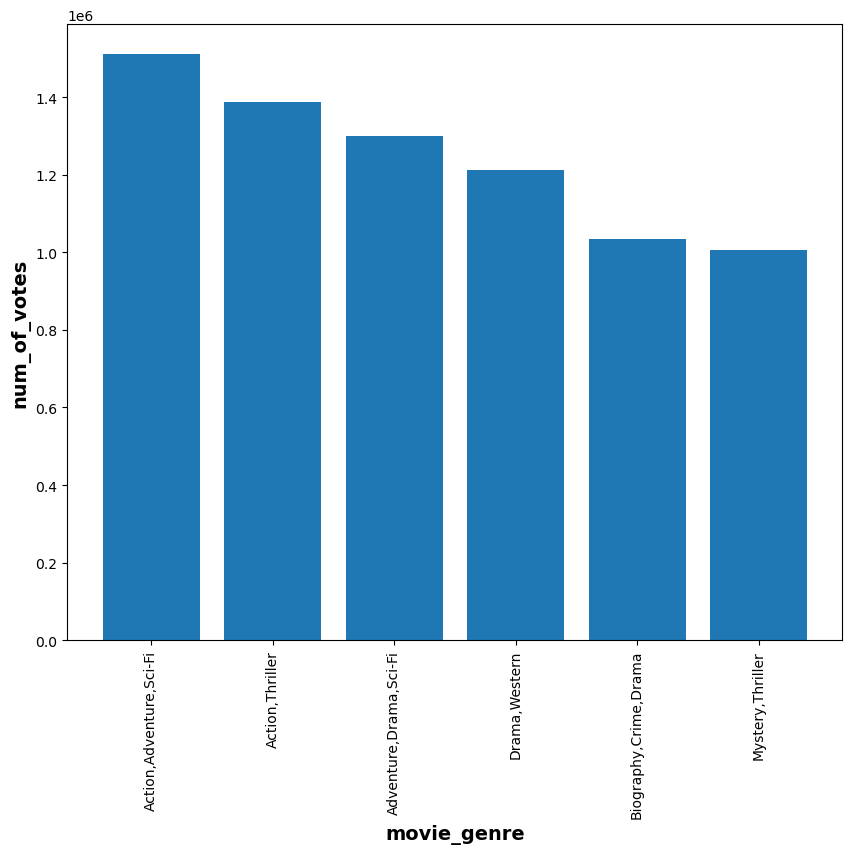

In [22]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.xlabel("movie_genre", fontsize=14, fontweight='bold')
plt.ylabel("num_of_votes", fontsize =14, fontweight= 'bold')

plt.bar(y.index, y.values);

**The plot can be useful in identifying which movie genres are more popular among users, which can be helpful in making decisions related to marketing and distribution of movies.

#### Correlation

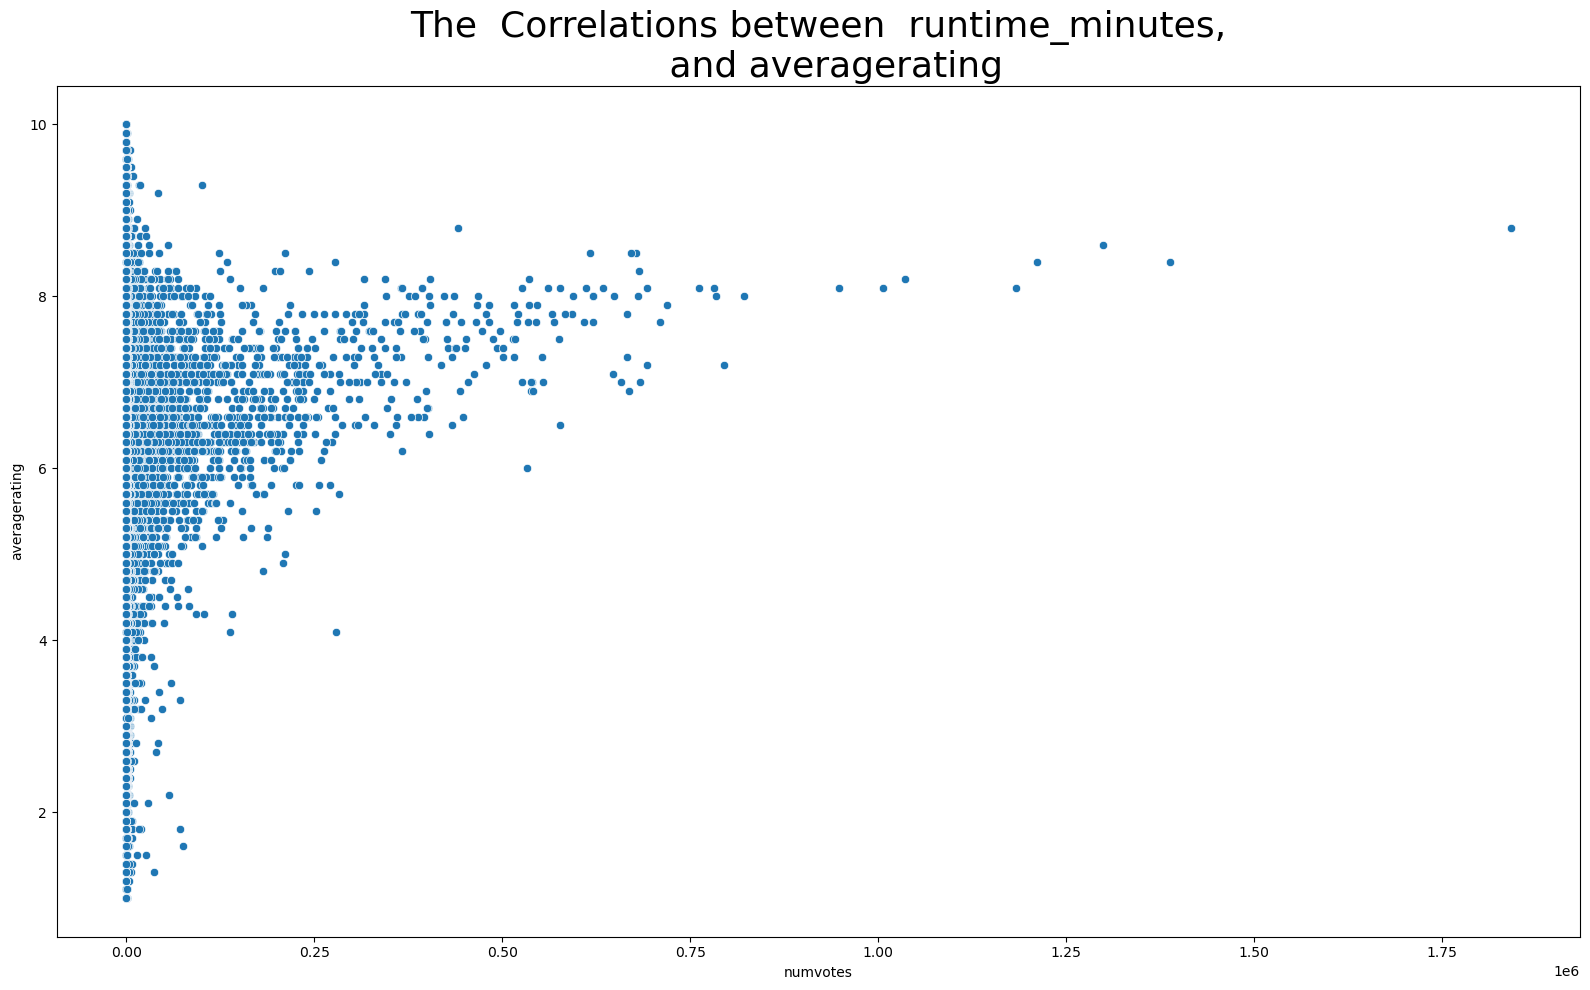

In [23]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='numvotes', y='averagerating', data = imdb)
plt.title("The  Correlations between  runtime_minutes,\n   and averagerating", fontsize=26)
plt.tight_layout()
plt.show()

One interpretation of the plot is that it depicts the relationship between the number of votes a film receives and its average rating. This could help identify patterns and trends in how users rate movies on the platform where the data was gathered.

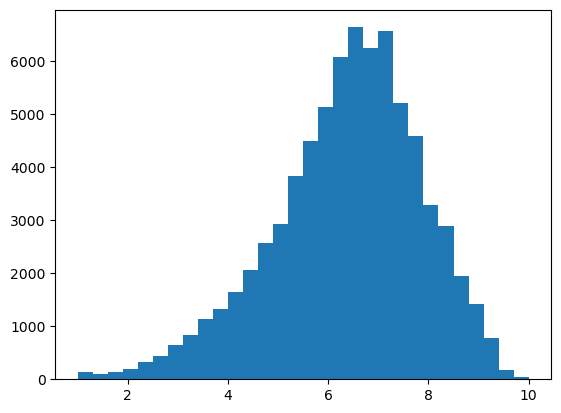

In [24]:
plt.hist(imdb['averagerating'], bins = 30);

**The histogram has 10 bins which represent the range of values of 'averagerating' data divided into 10 equal intervals. The x-axis represents the intervals and the y-axis shows the count of observations that fall within each bin.
The distribution of 'averagerating' appears to be slightly skewed to the right, indicating that the majority of the films have a rating of 6-8 on a scale of 1-10.

# Findings

This analysis leads us to the following reccommendations for the types of films that are the best performing in the box office:

1. The production budget of a movie has an impact on the gross revenue generated by the movie.
2. 
3. 

The length of a film (Runtime) of a film has no impact on its box office performance.
The Production Budget of a film has a modereately negative correlation with its return on investment.
The Worldwide Gross of a film has no impact on its return on investment.
Movies released in the Summer are more likely to yield a higher return on investment. Though September (Fall) had the highest average return on investment, the number of films released was significantly less than other months. Therefore, it would not have been an accurate measure to determine the optimal time to release a film.
'Horror' and 'Music' genres are more likely to have a higher return on investment.. It is however important to note that 'Action' and 'Adventure' films are the top most grossing.
Films directed by Kyle Balda, Pierre Coffin, Chris Rennaud, David F. Sandberg, and James Wan produce the highest return on investment.
Films written by Gary Dauberman produce the highest return on investment.
Success of a film is not determinant on the films rating

Microsoft company may want to consider increasing their production budget to increase their chances of higher worldwide gross.

On average, the production budget for movies lie between.. and the gross revenue for movies lies...